In [1]:
# 导入算法包以及数据集
from sklearn import neighbors
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

C:\Users\MeganLee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
iris = datasets.load_iris()
x_data = iris.data[:,:2]    # 只保留两个特征，增加难度
y_data = iris.target

x_train,x_test,y_train,y_test = train_test_split(x_data, y_data)

In [3]:
knn = neighbors.KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [4]:
def plot(model):                # 画等高线图
    # 获取数据值所在的范围（作图范围）
    x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

    # 生成网格矩阵
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
    z = z.reshape(xx.shape)
    # 等高线图
    cs = plt.contourf(xx, yy, z)

In [14]:
xx, yy = np.meshgrid(np.arange(1,4,0.01), np.arange(4,7,0.01))

In [15]:
#xx

In [16]:
#yy

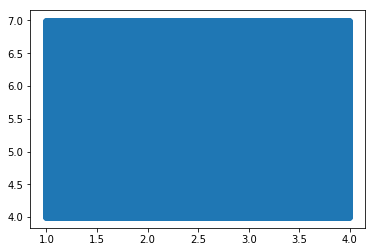

In [17]:
plt.scatter(xx,yy)
plt.show()

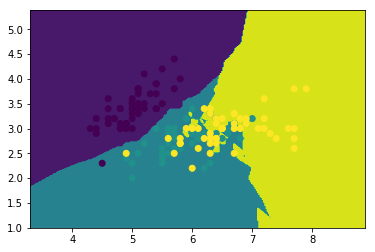

0.631578947368421

In [9]:
# 画图
plot(knn)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
# 准确率
knn.score(x_test, y_test)

In [10]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

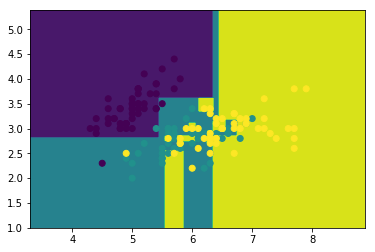

0.5789473684210527

In [11]:
# 画图
plot(dtree)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
# 准确率
dtree.score(x_test, y_test)

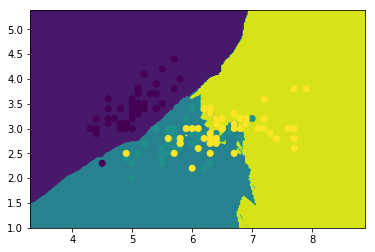

0.6842105263157895

In [12]:
bagging_knn = BaggingClassifier(knn, n_estimators=100)
# 输入数据建立模型
bagging_knn.fit(x_train, y_train)
plot(bagging_knn)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
bagging_knn.score(x_test, y_test)

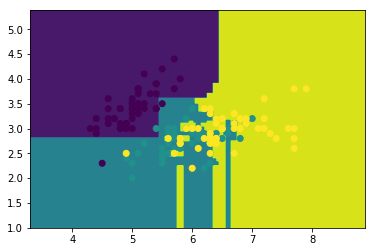

0.6052631578947368

In [13]:
bagging_tree = BaggingClassifier(dtree, n_estimators=100)
# 输入数据建立模型
bagging_tree.fit(x_train, y_train)
plot(bagging_tree)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
bagging_tree.score(x_test, y_test)